# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Les dates de départ et de fin sont codées dans l'URL: "wstart=199101" pour semaine 1 de l'année 1985 et "wend=201820" pour semaine 20 de l'année 2018. La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [2]:
data_url = "https://websenti.u707.jussieu.fr/sentiweb/api/data/rest/getIncidenceFlat?indicator=7&wstart=199101&wend=201820&geo=PAY1&$format=csv"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données sur le site d'origine:

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |


In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     201820          7  13417     9692   17142      20          14   
1     201819          7  16718    12351   21085      25          18   
2     201818          7  16120    11128   21112      25          17   
3     201817          7  16154    11960   20348      25          19   
4     201816          7  18341    13836   22846      28          21   
5     201815          7  17946    13622   22270      27          20   
6     201814          7  15036    10780   19292      23          17   
7     201813          7  16373    12472   20274      25          19   
8     201812          7  18819    14373   23265      29          22   
9     201811          7  15478    11427   19529      24          18   
10    201810          7  15753    11901   19605      24          18   
11    201809          7  13217     9653   16781      20          15   
12    201808          7  13390     9832   16948      20          15   
13    201807          7  13453    10096   16810      20          15   
14    201806          7  15491    11679   19303      24          18   
15    201805          7  15078    11374   18782      23          17   
16    201804          7  14562    10973   18151      22          17   
17    201803          7   7972     5473   10471      12           8   
18    201802          7  10976     7974   13978      17          12   
19    201801          7  11471     8430   14512      17          12   
20    201752          7  11120     7732   14508      17          12   
21    201751          7   8055     5279   10831      12           8   
22    201750          7  10095     7184   13006      15          11   
23    201749          7  11214     8103   14325      17          12   
24    201748          7   8686     5706   11666      13           8   
25    201747          7   8741     5969   11513      13           9   
26    201746          7   5708     3483    7933       9           6   
27    201745          7   4902     2777    7027       8           5   
28    201744          7   5645     3125    8165       9           5   
29    201743          7   6892     3966    9818      11           7   
...      ...        ...    ...      ...     ...     ...         ...   
1399  199130          7  15915     6368   25462      28          11   
1400  199129          7  23744    14703   32785      42          26   
1401  199128          7  24222    15617   32827      43          28   
1402  199127          7  20309    12868   27750      36          23   
1403  199126          7  17608    11304   23912      31          20   
1404  199125          7  16169    10700   21638      28          18   
1405  199124          7  16171    10071   22271      28          17   
1406  199123          7  11947     7671   16223      21          13   
1407  199122          7  15452     9953   20951      27          17   
1408  199121          7  14903     8975   20831      26          16   
1409  199120          7  19053    12742   25364      34          23   
1410  199119          7  16739    11246   22232      29          19   
1411  199118          7  21385    13882   28888      38          25   
1412  199117          7  13462     8877   18047      24          16   
1413  199116          7  14857    10068   19646      26          18   
1414  199115          7  13975     9781   18169      25          18   
1415  199114          7  12265     7684   16846      22          14   
1416  199113          7   9567     6041   13093      17          11   
1417  199112          7  10864     7331   14397      19          13   
1418  199111          7  15574    11184   19964      27          19   
1419  199110          7  16643    11372   21914      29          20   
1420  199109          7  13741     8780   18702      24          15   
1421  199108          7  13289     8813   17765      23          15   
1422  199107          7  12337     8077   16597      22          15   
1423  199106          7  10877  

Y a-t-il des points manquants dans ce jeux de données ?

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Non, tout va bien.

In [6]:
data = raw_data

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [8]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

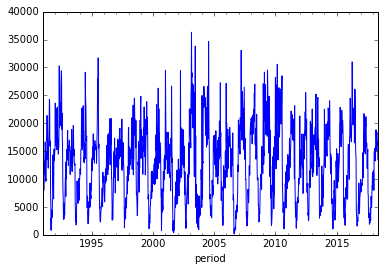

In [10]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

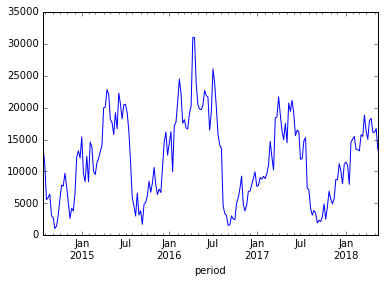

In [11]:
sorted_data['inc'][-200:].plot()

Pour mieux localiser les creux, regardons les incidences les plus faibles des dix dernières années.

In [12]:
last = sorted_data[-520:]
last[last['inc'] < 3000]

week  indicator   inc  inc_low  inc_up  inc100  \
period                                                                    
2008-08-25/2008-08-31  200835          7  2304        0    4896       4   
2008-09-01/2008-09-07  200836          7  2821      365    5277       5   
2009-08-31/2009-09-06  200936          7  1681      212    3150       3   
2009-09-07/2009-09-13  200937          7  1989      362    3616       3   
2009-09-14/2009-09-20  200938          7  2802      999    4605       4   
2010-09-06/2010-09-12  201036          7  1629      241    3017       3   
2010-09-13/2010-09-19  201037          7  1056        0    2338       2   
2011-09-12/2011-09-18  201137          7  1183        9    2357       2   
2011-09-26/2011-10-02  201139          7  2504      414    4594       4   
2012-09-10/2012-09-16  201237          7  2505        0    5339       4   
2012-09-17/2012-09-23  201238          7  2684      621    4747       4   
2013-08-05/2013-08-11  201332          7  2986      635    5337       5   
2014-09-01/2014-09-07  201436          7  2765      707    4823       4   
2014-09-08/2014-09-14  201437          7  1034        0    2338       2   
2014-09-15/2014-09-21  201438          7  1431      130    2732       2   
2014-11-10/2014-11-16  201446          7  2638      808    4468       4   
2015-09-07/2015-09-13  201537          7  1710      315    3105       3   
2016-08-29/2016-09-04  201635          7  1554       38    3070       2   
2016-09-05/2016-09-11  201636          7  1621       33    3209       2   
2016-09-19/2016-09-25  201638          7  2550        0    5121       4   
2016-09-26/2016-10-02  201639          7  2437      595    4279       4   
2017-09-04/2017-09-10  201736          7  1903      450    3356       3   
2017-09-11/2017-09-17  201737          7  2360      700    4020       4   
2017-09-18/2017-09-24  201738          7  2138      736    3540       3   
2017-09-25/2017-10-01  201739          7  2901      917    4885       4   
2017-10-09/2017-10-15  201741          7  2516     1110    3922       4   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
2008-08-25/2008-08-31           0          8        FR   France  
2008-09-01/2008-09-07           1          9        FR   France  
2009-08-31/2009-09-06           1          5        FR   France  
2009-09-07/2009-09-13           0          6        FR   France  
2009-09-14/2009-09-20           1          7        FR   France  
2010-09-06/2010-09-12           1          5        FR   France  
2010-09-13/2010-09-19           0          4        FR   France  
2011-09-12/2011-09-18           0          4        FR   France  
2011-09-26/2011-10-02           1          7        FR   France  
2012-09-10/2012-09-16           0          8        FR   France  
2012-09-17/2012-09-23           1          7        FR   France  
2013-08-05/2013-08-11           1          9        FR   France  
2014-09-01/2014-09-07           1          7        FR   France  
2014-09-08/2014-09-14           0          4        FR   France  
2014-09-15/2014-09-21           0          4        FR   France  
2014-11-10/2014-11-16           1          7        FR   France  
2015-09-07/2015-09-13           1          5        FR   France  
2016-08-29/2016-09-04           0          4        FR   France  
2016-09-05/2016-09-11           0          4        FR   France  
2016-09-19/2016-09-25           0          8        FR   France  
2016-09-26/2016-10-02           1          7        FR   France  
2017-09-04/2017-09-10           1          5        FR   France  
2017-09-11/2017-09-17           1          7        FR   France  
2017-09-18/2017-09-24           1          5        FR   France  
2017-09-25/2017-10-01           1          7        FR   France  
2017-10-09/2017-10-15           2          6        FR   France

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de la varicelle est faible en été, cette
modification ne risque pas de fausser nos conclusions.

In [13]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                         for y in range(sorted_data.index[0].year,
                                        sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

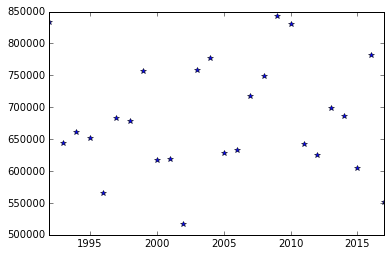

In [15]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [16]:
yearly_incidence.sort_values()

2002    516689
2017    551041
1996    564901
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre que les épidémies les plus fréquentes touchent autour de 600.000 personnes, donc un peu plus d'1% de la population française. Les variations d'une année à l'autre ne sont pas très importantes, car une épidémie ne fait jamais moins que 500.000 ou plus de 850.000 victimes.

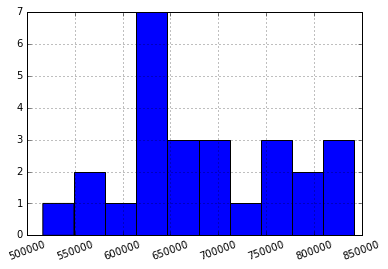

In [17]:
yearly_incidence.hist(xrot=20)